# AIDM7360  Group Project
## Gourp Name : Teletubbies
## Team Members: 
+ Huang zefei:
+ Chen Xiaoqi: 20465106
+ Guo yuju:
+ Cai runlin:

In [3]:
import numpy as np 
import pandas as pd 
import sqlite3
from sqlite3 import Error
import warnings

In [4]:
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

In [5]:
path = '../data/USvideos.csv'

In [6]:
df = pd.read_csv(path)

In [7]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [6]:
df.columns.values

array(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'], dtype=object)

In [7]:
df.shape 

(19998, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           19998 non-null  object
 1   title              19998 non-null  object
 2   publishedAt        19998 non-null  object
 3   channelId          19998 non-null  object
 4   channelTitle       19998 non-null  object
 5   categoryId         19998 non-null  int64 
 6   trending_date      19998 non-null  object
 7   tags               19998 non-null  object
 8   view_count         19998 non-null  int64 
 9   likes              19998 non-null  int64 
 10  dislikes           19998 non-null  int64 
 11  comment_count      19998 non-null  int64 
 12  thumbnail_link     19998 non-null  object
 13  comments_disabled  19998 non-null  bool  
 14  ratings_disabled   19998 non-null  bool  
 15  description        19868 non-null  object
dtypes: bool(2), int64(5), object(9)
memory u

In [9]:
#df[df["description"].apply(lambda x: pd.isna(x))].head(3)

In [10]:
#df["description"] = df["description"].fillna(value="")

In [11]:
df1 = df.copy()

In [12]:
df1.drop(['comments_disabled', 'ratings_disabled', 'thumbnail_link','description'], axis = 1, inplace = True)

In [13]:
df1.columns.values

array(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count'], dtype=object)

In [14]:
df1.set_index('video_id', inplace = True)

In [15]:
newDataPath = '../data/'
newCsvName = 'RUsvideo.csv'
df1.to_csv(newDataPath + newCsvName)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19998 entries, 3C66w5Z0ixs to xoWxv2yZXLQ
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          19998 non-null  object
 1   publishedAt    19998 non-null  object
 2   channelId      19998 non-null  object
 3   channelTitle   19998 non-null  object
 4   categoryId     19998 non-null  int64 
 5   trending_date  19998 non-null  object
 6   tags           19998 non-null  object
 7   view_count     19998 non-null  int64 
 8   likes          19998 non-null  int64 
 9   dislikes       19998 non-null  int64 
 10  comment_count  19998 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.8+ MB


In [17]:
newpath = '../data/category.csv'

In [18]:
category = pd.read_csv(newpath)

In [19]:
#category

## Create the database

In [20]:
def create_connection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)
        
    return conn

In [21]:
pathToFile = "../data/"
fileName = "USvideos.db"
dbConnection = create_connection(pathToFile + fileName)

In [22]:
if dbConnection:
    dbConnection.close()
    print('Connection closed')

Connection closed


## Creating tables

- Creat a video table
- Creat a catagory table

In [23]:
def create_table(conn, create_table_sql):
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)

In [24]:
sql_create_USvideos_table = """ CREATE TABLE IF NOT EXISTS USvideos (
                                    video_id text PRIMARY KEY,
                                    title text,                                      
                                    publishedAt DataTime ,
                                    tags text,
                                    views_count integer,
                                    likes integer,
                                    dislikes integer,
                                    comment_count integer
                                    description text
                                    categoryId integer
                                    ); """

In [25]:
sql_create_category_table =  """ CREATE TABLE IF NOT EXISTS category (
                                    categoryId text NOT NULL,
                                    category_title text NOT NULL,
                                    FOREIGN KEY (categoryId) REFERENCES USvideos (video_id)
                                ); """

In [26]:
pathToFile = "../data/"
fileName = "USvideos.db"
dbConnection = create_connection(pathToFile + fileName)

if dbConnection is not None:
    
    create_table(dbConnection, sql_create_USvideos_table)
    
    create_table(dbConnection, sql_create_category_table)
    dbConnection.close()
else:
    print("Error! Cannot create the database connection.")

# Inserting Data

In [27]:
import csv

In [28]:
#insert_Usvideos = '''INSERT INTO Usvideos VALUES(?,?,?,?,?,?,?,?,?,?,?)'''

#insert_category = '''INSERT INTO category VALUES(?,?)'''

In [29]:
fileName = 'USvideos.db'
csvFilePath = '../data/RUsvideo.csv'
newcsvPath = '../data/category.csv'

In [30]:
connection = sqlite3.connect(fileName)
cursor = connection.cursor()

In [31]:
conn= sqlite3.connect(fileName)
df1 = pd.read_csv(csvFilePath)
df1.to_sql('USvideos', conn, if_exists='append', index=False)
print('ok')

ok


In [32]:
conn= sqlite3.connect(fileName)
category = pd.read_csv(newcsvPath)
category.to_sql('category', conn, if_exists='append', index=False)
print('ok')

ok


###### Because you keep making this mistake. There is still no solution. So we have to adopt the above method first, so as not to affect the project schedule.
#ERROR：Incorrect number of bindings supplied. The current statement uses 9, and there are 1 supplied.

## Exhibition

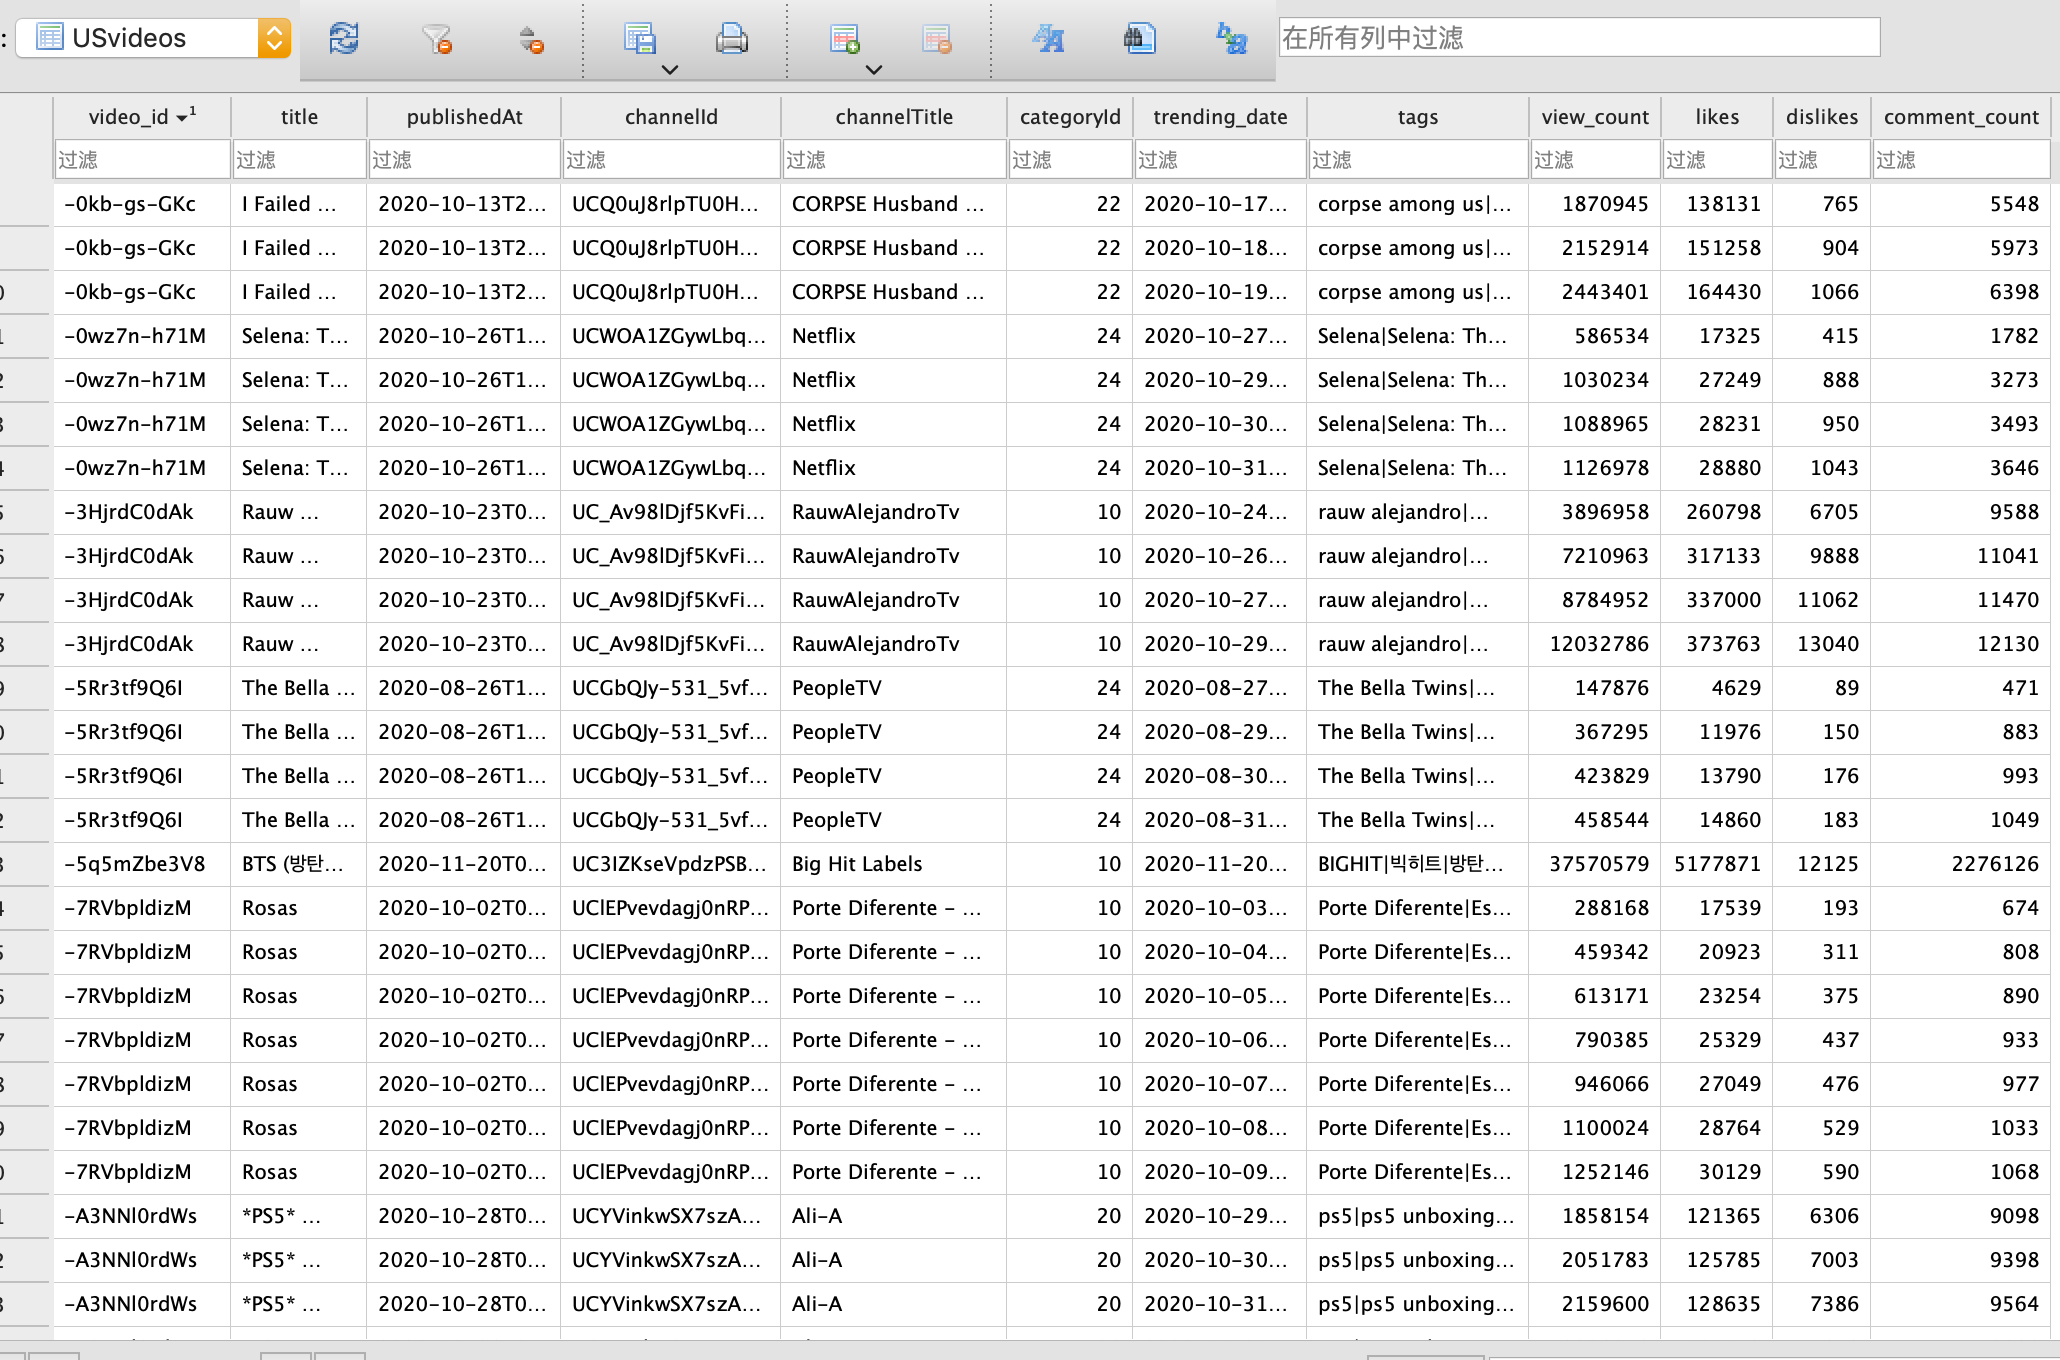

This image is illustrate a databese of video identification information.

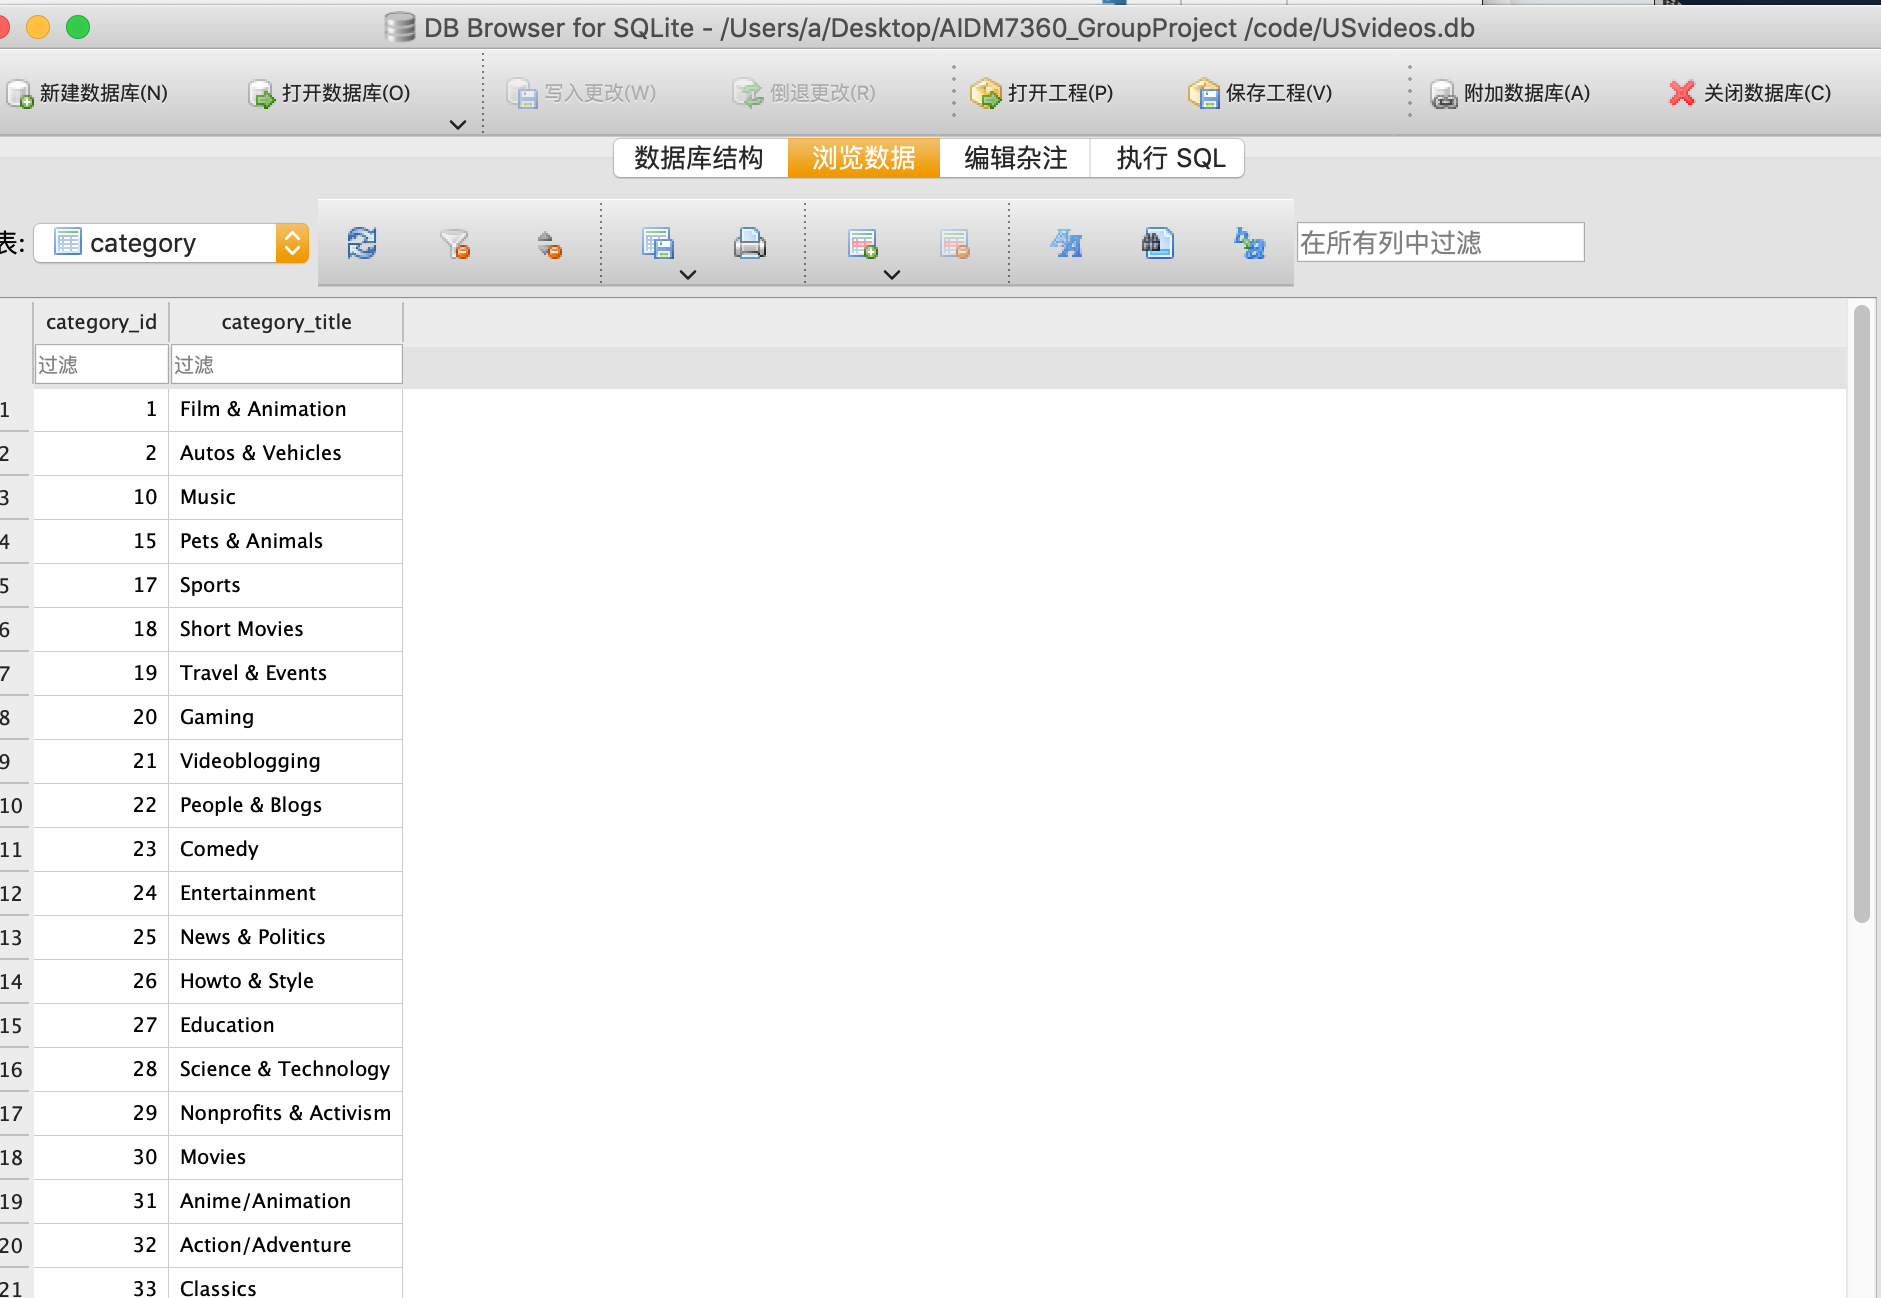

This image is illustrate a databese of category content.

## Updating Data

In [33]:
fileName = "USvideos.db"
dbConnection = create_connection(fileName)

In [34]:
def update_task(conn, task):
    """
    update priority, begin_date, and end date of a task
    :param conn:
    :param task:
    :return: project id
    """
    sql = ''' UPDATE USvideos
              SET title = ?
              WHERE video_id = ?'''
    cur = conn.cursor()
    cur.execute(sql, task)
    conn.commit()

In [35]:
update_task(dbConnection, ('Test title', 1))

In [36]:
def test_select(conn, vid):
    cur = conn.cursor()
    cur.execute("SELECT video_id, title FROM USvideos LIMIT 5")
    rows = cur.fetchall()
    for row in rows:
        print(row)
test_select(dbConnection,1)

('3C66w5Z0ixs', 'I ASKED HER TO BE MY GIRLFRIEND...')
('M9Pmf9AB4Mo', 'Apex Legends | Stories from the Outlands – “The Endorsement”')
('J78aPJ3VyNs', 'I left youtube for a month and THIS is what happened.')
('kXLn3HkpjaA', 'XXL 2020 Freshman Class Revealed - Official Announcement')
('VIUo6yapDbc', 'Ultimate DIY Home Movie Theater for The LaBrant Family!')


## Querying Data

In [1]:
def select_all_USvideos(conn):
    """
    Query all rows in the USvideos table
    :param conn: the Connection object
    :return:
    """
    cur = conn.cursor()
    cur.execute("SELECT * FROM USvideos")

    rows = cur.fetchall()

    for row in rows:
        print(row)

In [2]:
select_all_USvideos(dbConnection)

NameError: name 'dbConnection' is not defined

In [39]:
def select_USvideos_by_likes(conn, likes):
    """
    Query USvideos by likes
    :param conn: the Connection object
    :param likes:
    :return:
    """
    cur = conn.cursor()
    cur.execute("SELECT video_id, title FROM USvideos WHERE likes=? ", (likes,))

    rows = cur.fetchall()

    for row in rows:
        print(row)

In [40]:
def select_USvideos_by_priority(conn, priority):
    """
    Query USvideos by likes
    :param conn: the Connection object
    :param likes:
    :return:
    """
    cur = conn.cursor()
    cur.execute("SELECT * FROM USvideos WHERE priority=?", (priority,))

    rows = cur.fetchall()

    for row in rows:
        print(row)

In [41]:
print("1. Query video_id, tilte FROM USvideos by likes :")
#select_USvideos_by_likes(dbConnection, 0)

1. Query video_id, tilte FROM USvideos by likes :


In [42]:
print("2. Query all USvideos")
#select_all_USvideos(dbConnection)

2. Query all USvideos


## Template

This part is inside the other notebook (7360_Term-project_template)